In [1]:
#T-SNE stuff only - cleaned up

In [2]:
%pip install numpy
%pip install pandas
%pip install seaborn
%matplotlib inline
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print("Hello World!")

Hello World!


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import OneHotEncoder

# One hot encoding categorical feature
def one_hot_enc(df,col_name):
    df = df.reset_index(drop=True)
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[col_name]]).toarray())
    df = df.drop(col_name, axis=1)
    df_final = df.join(encoder_df)
    return df_final

In [44]:
def plotting(df):
    df['mult'] = (df['Feature 1']) * (df['Feature 2'])
    # plotting needs changes
    plt.scatter(df['Feature 1'],df['Feature 2'], c= df['mult'])
    plt.colorbar()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    df = df.drop('mult', axis=1)

In [6]:
from sklearn.neighbors import NearestNeighbors
def find_eps(df):
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(df)
    distances, indices = nbrs.kneighbors(df)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

In [40]:
def clustering(df, mode='dbscan', eps=10):
    # Create and plot clusters
    # Number of centroids
    # Optimal number of clusters is 22, according to the Elbow method
    if mode == 'km':
        K = 12
        # Select random observation as a centroid
        km = KMeans(n_clusters=K, init='random', n_init=10, max_iter=300, tol=1e-02, random_state=0)
        prediction = km.fit_predict(df)
        df['cluster'] = km.labels_
    else:
        clustering = DBSCAN(eps=eps, min_samples=10).fit(df)
        df['cluster'] = clustering.labels_
    return df

def clustering_plot(df):
    plt.figure(figsize=(16, 10))
    sns.scatterplot(
        x='Feature 1', y='Feature 2',
        hue='cluster',
        palette='gist_rainbow',
        # style='name',
        legend='full',
        data=df
    )
    plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)

In [8]:
#Reading the music data from CSV

df = pd.read_csv("data/dataset.csv")
print(len(df))
df = df.dropna()
print(len(df))

16269
16268


In [9]:
#Feature Selection

columns_to_select = [
    # "id_x",             # Track id
    # "track.artists",
    # "track.name",
    # "playlist_id",
    # "name",             # Playlist name
    # "track.popularity"
    # "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature"
]

# Filter the playlists if needed and drop duplicates
# df_filtered = df[df['name'].isin(playlists_to_select)]
df_filtered = df.drop_duplicates(subset=['id_x'])
df_filtered = df_filtered[columns_to_select]
df_filtered = df_filtered.reset_index(drop=True)

df_filtered.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.695,0.541,2,-8.350,1,0.0460,0.00707,0.000000,0.1040,0.409,140.018,4
1,0.573,0.507,11,-8.084,1,0.0342,0.75900,0.000001,0.3770,0.363,123.183,4
2,0.594,0.640,10,-6.865,1,0.0330,0.01690,0.000000,0.1350,0.492,92.871,4
3,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4
4,0.742,0.527,8,-6.892,0,0.0769,0.32700,0.000000,0.2500,0.638,84.974,4


In [10]:
X = df_filtered
X_enc = one_hot_enc(df_filtered,'key')
X_no_key = X.drop('key', axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler

# t-SNE

# Examples:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

# Scale/normalize values
scaler = StandardScaler()

# Not encoded key, normalized
X_norm = scaler.fit_transform(X)

# Encoded key, normalized
X_enc_norm = scaler.fit_transform(X_enc)

# No key, normalized
X_no_key_norm = scaler.fit_transform(X_no_key)

# Perform t-SNE to 2 dimensions
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)

# Not encoded, not normalized
tsne_results = tsne.fit_transform(X);

# Not encoded, normalized
tsne_results_norm = tsne.fit_transform(X_norm);

# Encoded, not normalized
tsne_results_enc= tsne.fit_transform(X_enc);

# Encoded, normalized
tsne_results_enc_norm= tsne.fit_transform(X_enc_norm);

# No key, not normalized
tsne_results_no_key= tsne.fit_transform(X_no_key);

# No key, normalized
tsne_results_no_key_norm= tsne.fit_transform(X_no_key_norm);


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 14538 samples in 0.011s...


/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


[t-SNE] Computed neighbors for 14538 samples in 0.483s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14538
[t-SNE] Computed conditional probabilities for sample 2000 / 14538
[t-SNE] Computed conditional probabilities for sample 3000 / 14538
[t-SNE] Computed conditional probabilities for sample 4000 / 14538
[t-SNE] Computed conditional probabilities for sample 5000 / 14538
[t-SNE] Computed conditional probabilities for sample 6000 / 14538
[t-SNE] Computed conditional probabilities for sample 7000 / 14538
[t-SNE] Computed conditional probabilities for sample 8000 / 14538
[t-SNE] Computed conditional probabilities for sample 9000 / 14538
[t-SNE] Computed conditional probabilities for sample 10000 / 14538
[t-SNE] Computed conditional probabilities for sample 11000 / 14538
[t-SNE] Computed conditional probabilities for sample 12000 / 14538
[t-SNE] Computed conditional probabilities for sample 13000 / 14538
[t-SNE] Computed conditional probabilities for sample 14000 / 14538

/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14538 samples in 2.737s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14538
[t-SNE] Computed conditional probabilities for sample 2000 / 14538
[t-SNE] Computed conditional probabilities for sample 3000 / 14538
[t-SNE] Computed conditional probabilities for sample 4000 / 14538
[t-SNE] Computed conditional probabilities for sample 5000 / 14538
[t-SNE] Computed conditional probabilities for sample 6000 / 14538
[t-SNE] Computed conditional probabilities for sample 7000 / 14538
[t-SNE] Computed conditional probabilities for sample 8000 / 14538
[t-SNE] Computed conditional probabilities for sample 9000 / 14538
[t-SNE] Computed conditional probabilities for sample 10000 / 14538
[t-SNE] Computed conditional probabilities for sample 11000 / 14538
[t-SNE] Computed conditional probabilities for sample 12000 / 14538
[t-SNE] Computed conditional probabilities for sample 13000 / 14538
[t-SNE] Computed conditional probabilities for sample 14000 / 14538

/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14538 samples in 0.456s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14538
[t-SNE] Computed conditional probabilities for sample 2000 / 14538
[t-SNE] Computed conditional probabilities for sample 3000 / 14538
[t-SNE] Computed conditional probabilities for sample 4000 / 14538
[t-SNE] Computed conditional probabilities for sample 5000 / 14538
[t-SNE] Computed conditional probabilities for sample 6000 / 14538
[t-SNE] Computed conditional probabilities for sample 7000 / 14538
[t-SNE] Computed conditional probabilities for sample 8000 / 14538
[t-SNE] Computed conditional probabilities for sample 9000 / 14538
[t-SNE] Computed conditional probabilities for sample 10000 / 14538
[t-SNE] Computed conditional probabilities for sample 11000 / 14538
[t-SNE] Computed conditional probabilities for sample 12000 / 14538
[t-SNE] Computed conditional probabilities for sample 13000 / 14538
[t-SNE] Computed conditional probabilities for sample 14000 / 14538

/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14538 samples in 0.335s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14538
[t-SNE] Computed conditional probabilities for sample 2000 / 14538
[t-SNE] Computed conditional probabilities for sample 3000 / 14538
[t-SNE] Computed conditional probabilities for sample 4000 / 14538
[t-SNE] Computed conditional probabilities for sample 5000 / 14538
[t-SNE] Computed conditional probabilities for sample 6000 / 14538
[t-SNE] Computed conditional probabilities for sample 7000 / 14538
[t-SNE] Computed conditional probabilities for sample 8000 / 14538
[t-SNE] Computed conditional probabilities for sample 9000 / 14538
[t-SNE] Computed conditional probabilities for sample 10000 / 14538
[t-SNE] Computed conditional probabilities for sample 11000 / 14538
[t-SNE] Computed conditional probabilities for sample 12000 / 14538
[t-SNE] Computed conditional probabilities for sample 13000 / 14538
[t-SNE] Computed conditional probabilities for sample 14000 / 14538

/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14538 samples in 0.334s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14538
[t-SNE] Computed conditional probabilities for sample 2000 / 14538
[t-SNE] Computed conditional probabilities for sample 3000 / 14538
[t-SNE] Computed conditional probabilities for sample 4000 / 14538
[t-SNE] Computed conditional probabilities for sample 5000 / 14538
[t-SNE] Computed conditional probabilities for sample 6000 / 14538
[t-SNE] Computed conditional probabilities for sample 7000 / 14538
[t-SNE] Computed conditional probabilities for sample 8000 / 14538
[t-SNE] Computed conditional probabilities for sample 9000 / 14538
[t-SNE] Computed conditional probabilities for sample 10000 / 14538
[t-SNE] Computed conditional probabilities for sample 11000 / 14538
[t-SNE] Computed conditional probabilities for sample 12000 / 14538
[t-SNE] Computed conditional probabilities for sample 13000 / 14538
[t-SNE] Computed conditional probabilities for sample 14000 / 14538

/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14538 samples in 2.266s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14538
[t-SNE] Computed conditional probabilities for sample 2000 / 14538
[t-SNE] Computed conditional probabilities for sample 3000 / 14538
[t-SNE] Computed conditional probabilities for sample 4000 / 14538
[t-SNE] Computed conditional probabilities for sample 5000 / 14538
[t-SNE] Computed conditional probabilities for sample 6000 / 14538
[t-SNE] Computed conditional probabilities for sample 7000 / 14538
[t-SNE] Computed conditional probabilities for sample 8000 / 14538
[t-SNE] Computed conditional probabilities for sample 9000 / 14538
[t-SNE] Computed conditional probabilities for sample 10000 / 14538
[t-SNE] Computed conditional probabilities for sample 11000 / 14538
[t-SNE] Computed conditional probabilities for sample 12000 / 14538
[t-SNE] Computed conditional probabilities for sample 13000 / 14538
[t-SNE] Computed conditional probabilities for sample 14000 / 14538

In [45]:
#Plotting
lower_dim = pd.DataFrame(tsne_results, columns=['Feature 1', 'Feature 2'])
lower_dim_norm = pd.DataFrame(tsne_results_norm, columns=['Feature 1', 'Feature 2'])
lower_dim_enc = pd.DataFrame(tsne_results_enc, columns=['Feature 1', 'Feature 2'])
lower_dim_enc_norm = pd.DataFrame(tsne_results_enc_norm, columns=['Feature 1', 'Feature 2'])

lower_dim_no_key = pd.DataFrame(tsne_results_no_key, columns=['Feature 1', 'Feature 2'])

lower_dim_no_key_norm = pd.DataFrame(tsne_results_no_key_norm, columns=['Feature 1', 'Feature 2'])


#### Plot for not encoded, not normalized dataset

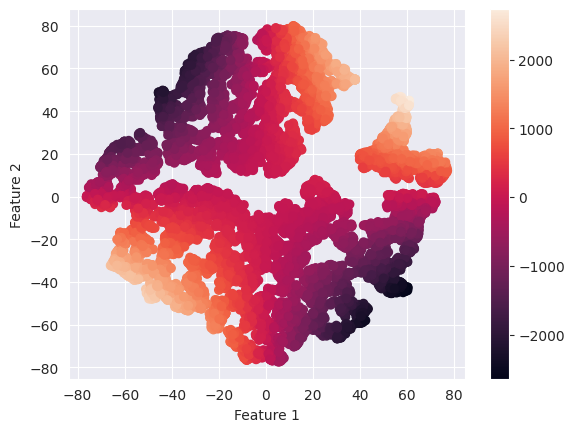

In [46]:
plotting(lower_dim)

#### Plot for not encoded, normalized dataset


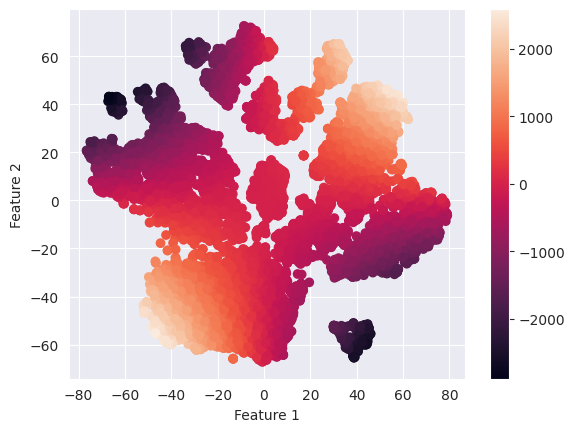

In [47]:
plotting(lower_dim_norm)

#### Plot for encoded, not normalized dataset


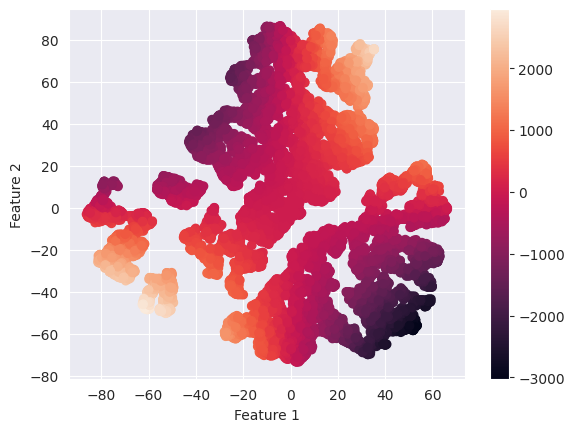

In [48]:
plotting(lower_dim_enc)

#### Plot for encoded, normalized dataset


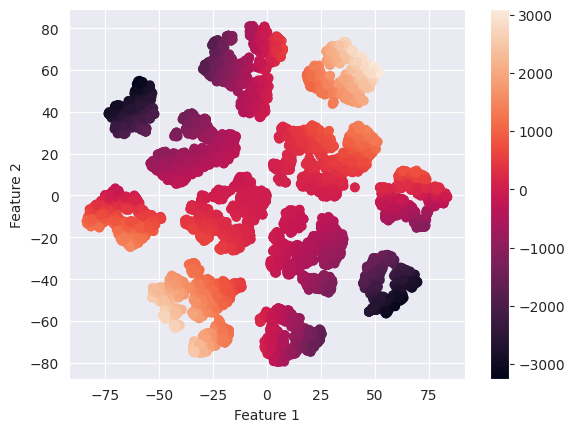

In [49]:
plotting(lower_dim_enc_norm)

#### Plot for no key, not normalized dataset


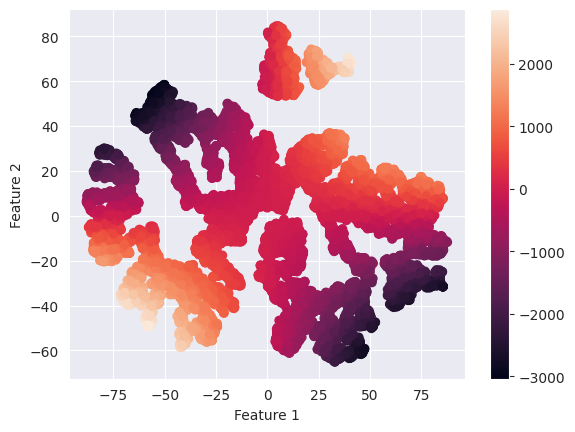

In [50]:
plotting(lower_dim_no_key)

#### Plot for no key, normalized dataset

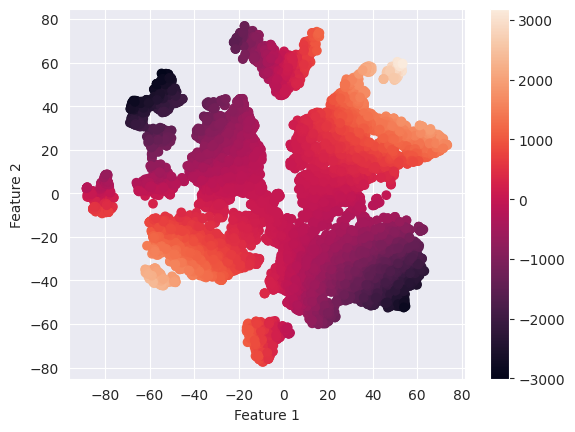

In [51]:
plotting(lower_dim_no_key_norm)

#### Quality Measurement, Metric : Trustworthiness

In [52]:
#Run trustworthiness
from sklearn.manifold import trustworthiness as trustworthiness
score = trustworthiness(lower_dim,X,n_neighbors=5, metric='euclidean')
score_norm = trustworthiness(lower_dim_norm,X_norm,n_neighbors=5, metric='euclidean')
score_enc = trustworthiness(lower_dim_enc,X_enc,n_neighbors=5, metric='euclidean')
score_enc_norm = trustworthiness(lower_dim_enc_norm,X_enc_norm,n_neighbors=5, metric='euclidean')
score_no_key = trustworthiness(lower_dim_no_key,X_no_key,n_neighbors=5, metric='euclidean')
score_no_key_norm = trustworthiness(lower_dim_no_key_norm,X_no_key_norm,n_neighbors=5, metric='euclidean')

print(f'Trustworthiness for not encoded, not normalized is :{score}')
print(f'Trustworthiness for not encoded, normalized is :{score_norm}')
print(f'Trustworthiness for encoded, not normalized is :{score_enc}')
print(f'Trustworthiness for encoded, normalized is :{score_enc_norm}')
print(f'Trustworthiness for no key, not normalized is :{score_no_key}')
print(f'Trustworthiness for no key, normalized is :{score_no_key_norm}')

/home/sakis/Masters  Courses/Period 5/Data mining/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Trustworthiness for not encoded, not normalized is :0.9810922113412442
Trustworthiness for not encoded, normalized is :0.9601173278524789
Trustworthiness for encoded, not normalized is :0.9862163310864747
Trustworthiness for encoded, normalized is :0.9898634075428213
Trustworthiness for no key, not normalized is :0.9905374282192989
Trustworthiness for no key, normalized is :0.9704976596445114


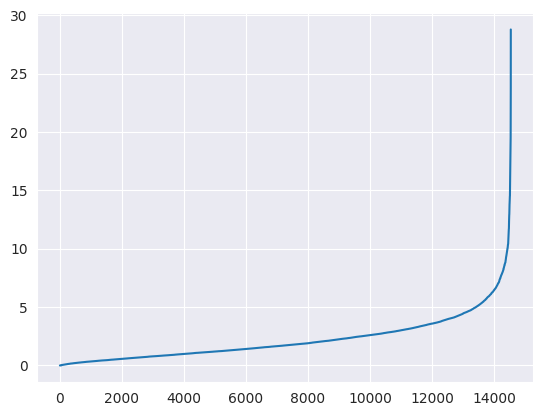

In [53]:
find_eps(lower_dim_enc_norm)

In [58]:
cluster_enc_norm = clustering(lower_dim_enc_norm,eps=10)

In [59]:
comparison = cluster_enc_norm.join(X['key'])

In [60]:
comparison

,Feature 1,Feature 2,mult,cluster,key
0,-21.656002,-47.145493,1020.982910,0,2
1,67.402756,-38.643078,-2604.649902,-1,11
2,63.609394,9.351985,594.874084,1,10
3,42.998341,13.332043,573.255737,2,0
4,-64.745087,-1.250205,80.944649,3,8
...,...,...,...,...,...
14533,49.604843,25.911657,1285.343750,74,0
14534,-38.496765,17.254490,-664.242065,143,9
14535,-80.706245,-11.177157,902.066406,76,8
14536,7.412375,-68.989670,-511.377289,15,6


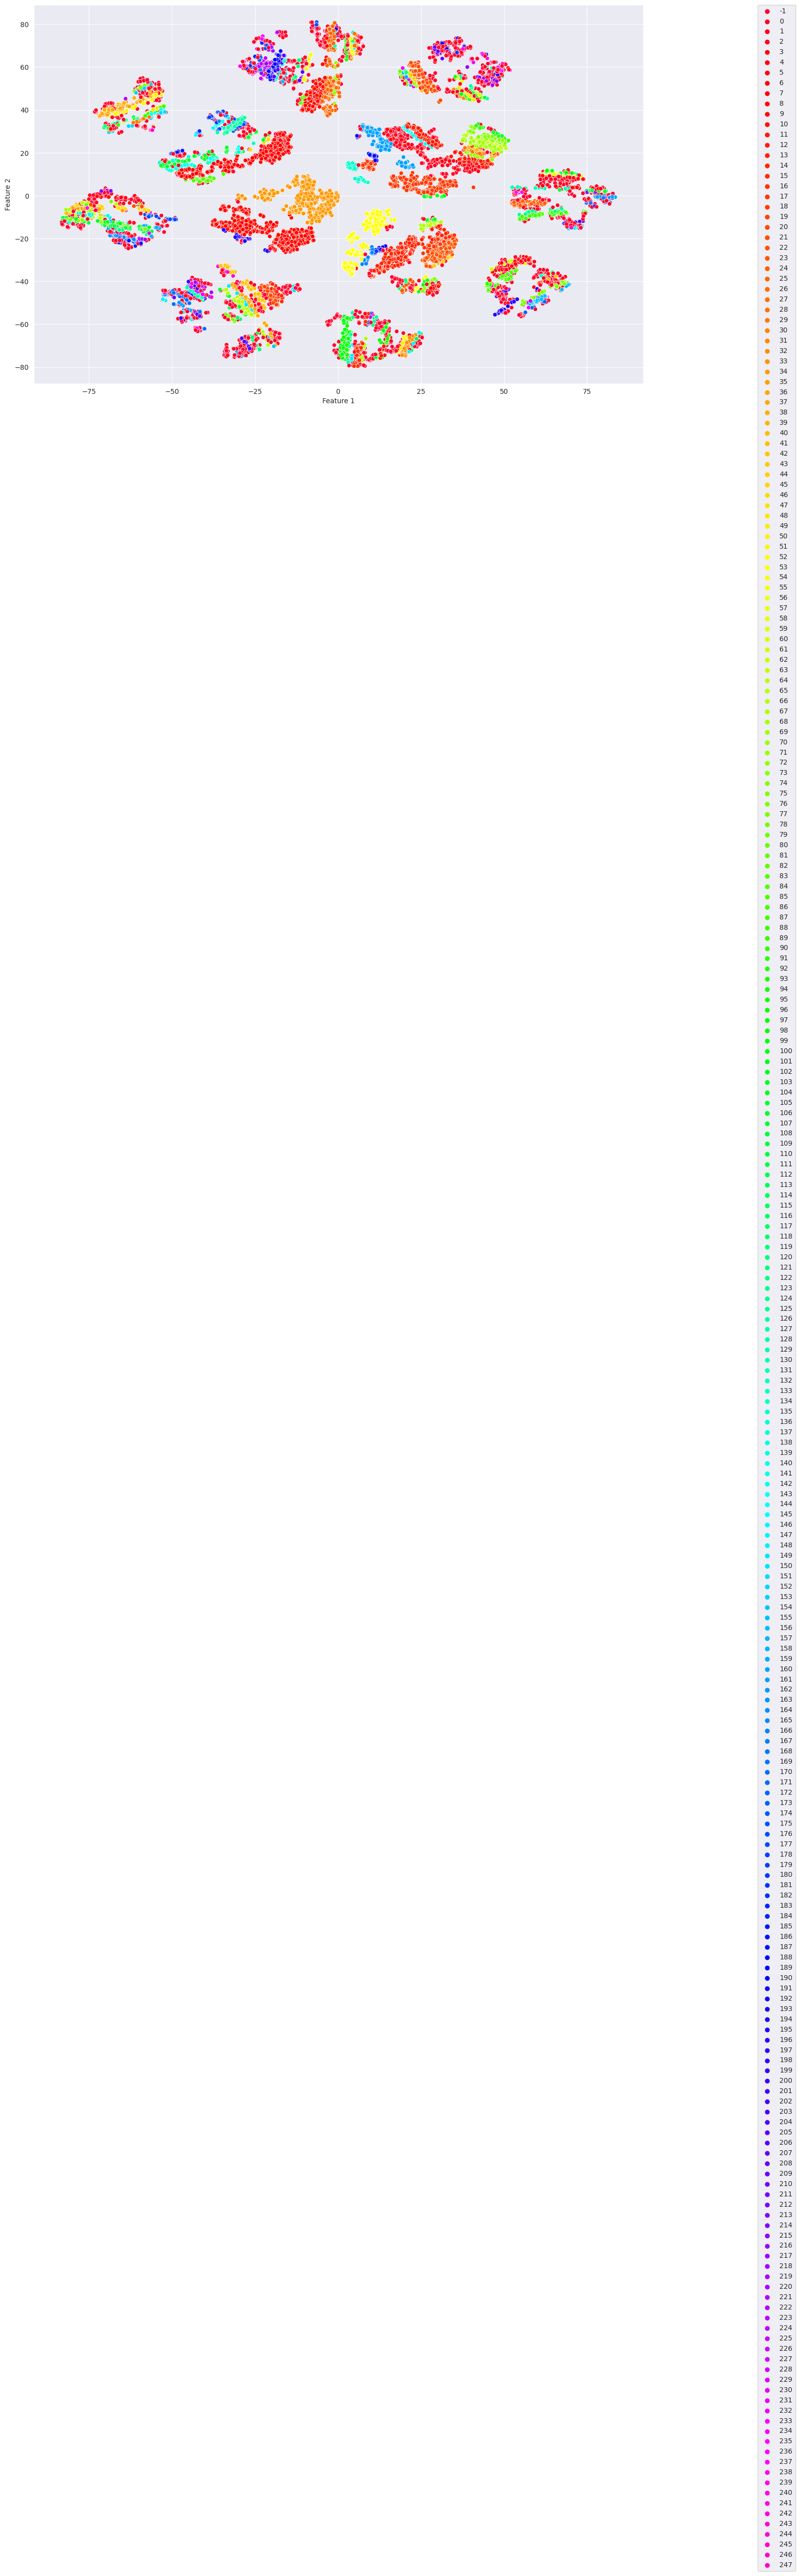

In [61]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='Feature 1', y='Feature 2',
    hue='cluster',
    palette='gist_rainbow',
    # style='name',
    legend='full',
    data=cluster_enc_norm
    )
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', borderaxespad=0)